In [19]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor


In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [31]:
noise_factor = 0.4
noisy_x_train = x_train + noise_factor * np.random.normal(loc=0, scale=1, size=x_train.shape)
noisy_x_test = x_test + noise_factor * np.random.normal(loc=0, scale=1, size=x_test.shape)

noisy_x_train = np.clip(noisy_x_train, 0, 1)
noisy_x_test = np.clip(noisy_x_test, 0, 1)

print(noisy_x_train.shape)
print(noisy_x_test.shape)

(60000, 784)
(10000, 784)


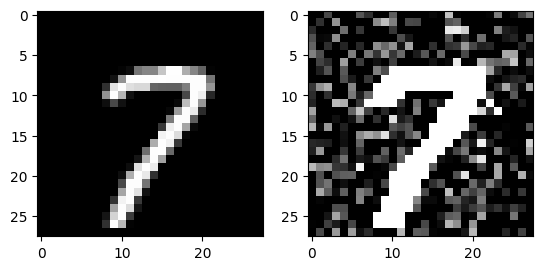

In [32]:
sample = 230

plt.subplot(1, 2, 1)
plt.imshow(x_train[sample].reshape(28, 28), cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(noisy_x_train[sample].reshape(28, 28), cmap='gray')

In [46]:
model = MLPRegressor(hidden_layer_sizes=(512, 256, 128, 256, 512), max_iter=10, activation='relu', solver='adam', verbose=2)

model.fit(noisy_x_train, x_train)

Iteration 1, loss = 2116.92484318
Iteration 2, loss = 1454.27601450
Iteration 3, loss = 1079.69495393
Iteration 4, loss = 948.61561679
Iteration 5, loss = 856.06049392
Iteration 6, loss = 788.47694609
Iteration 7, loss = 739.13805622
Iteration 8, loss = 691.48993886
Iteration 9, loss = 652.81602422
Iteration 10, loss = 621.37618623


C:\Users\Student\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(512, 256, 128, 256, 512), max_iter=10,
             verbose=2)

In [40]:
y_pred = model.predict(noisy_x_test)

print(noisy_x_test.shape)
print(y_pred.shape)

(10000, 784)
(10000, 784)


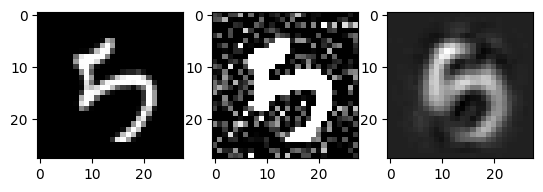

In [45]:
sample = 2369

plt.subplot(1, 3, 1)
plt.imshow(x_test[sample].reshape(28, 28), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(noisy_x_test[sample].reshape(28, 28), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(y_pred[sample].reshape(28, 28), cmap='gray')

In [ ]:
# no input/output layers
# input (28,28)
# vector
# no custom layer
# output (28,28)
# each layer - different hyper parameter
# MLP -> (1 type Layer)
# Transfer (pickle save model -- load)  invalid in other libraries
# No Parallel, GPU support
# limited params

In [71]:
# Neural Network
# Tensorflow, pytorch, ...
# pip install keras tensorflow

import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.metrics as metrics


In [74]:
print(dir(layers))

['Activation', 'ActivityRegularization', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'AutoContrast', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'Dense', 'DepthwiseConv1D', 'DepthwiseConv2D', 'Discretization', 'Dot', 'Dropout', 'ELU', 'EinsumDense', 'Embedding', 'Flatten', 'FlaxLayer', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'GlobalAveragePooling2D', 'GlobalAveragePooling3D', 'GlobalAvgPool1D', 'GlobalAvgPool2D', 'GlobalAvgPool3D', 'GlobalMaxPool1D', 'GlobalMaxPool2D', 'GlobalMaxPool3D', 

In [75]:
# Create Model
model = models.Sequential([
    # Input Layer
    layers.Input(shape=(28,28)),
    layers.Flatten(),

    # Hidden Layers
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='sigmoid'),

    # Output Layers
    layers.Dense(784, activation='relu'),
    layers.Reshape((28, 28))
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       201,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,240 (1.79 MB)

 Trainable params: 468,240 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Compile
# adam = optimizers.Adam(beta1=0.88, beta2=0.93, learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [77]:
# Train
model.fit(noisy_X, X, epochs=100,batch_size=64, verbose=2)



Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 784), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (None, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=True
  • mask=None

In [ ]:
from sklearn.metrics import classification_report

# Test, Evaluate
y_pred = model.predict(noisy_X)

print(classification_report(y, y_pred))

In [ ]:
# classification - digit detector

In [47]:
# Linear Regression (5 * w + 1 + b)

model = models.Sequential([
    # Input Layer
    layers.Input(shape=(5,)),
    layers.Flatten(),

    # Hidden Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),

    # Output Layers
    layers.Dense(1, activation='sigmoid')
])

model.summary()

NameError: name 'models' is not defined